In [2]:
import sys
import time
import obspy
import pyasdf # For accessing the data format used by NoisePy
import os, glob
import numpy as np
import pandas as pd
from obspy import UTCDateTime
import matplotlib.pyplot as plt
import scipy # Mainly used for interpolation
import pycwt # We will need to do this to perform the wavelet analysis for dispersion curve measurement
import noise_module as nm # Import code from NoisePy

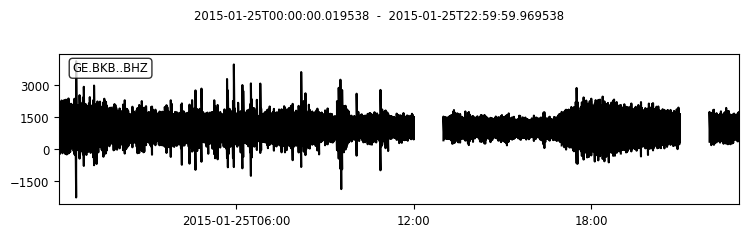

removing response for GE.BKB..BHZ | 2015-01-25T00:00:00.000000Z - 2015-01-25T22:59:59.666667Z | 3.0 Hz, 248400 samples using inv


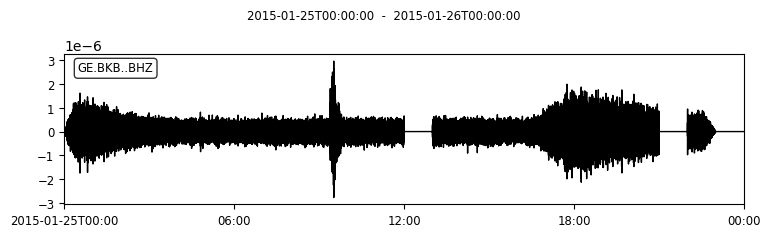

In [11]:
starttime = UTCDateTime('2015-01-25 00:00:00')
endtime = UTCDateTime('2015-01-26 00:00:00')

tr = obspy.read("data-discontinuous/*")
samp_freq = 3.
freqmin = 1./250
freqmax = 5
rm_resp_out   = 'VEL'               # choose remove response output = VEL
prepro_para = {'rm_resp':'inv', 'respdir':'./',
               'freqmin':freqmin,'freqmax':freqmax,
               'samp_freq':samp_freq,'rm_resp_out':rm_resp_out}
date_info = {'starttime':starttime,'endtime':endtime}
inv = obspy.read_inventory('stations/GE.BKB.xml')
tr.plot()
tr = nm.preprocess_raw(tr, inv, prepro_para, date_info)
tr.plot();